<a href="https://colab.research.google.com/github/schillgc/Python/blob/master/BirdScooter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<header>
      <h1><title>Bird Scooter in Louisville, KY</title></h1>
      <h2>Machine Learning for Time-Series CSV Data</h2>
            <cite>Gavin Schilling Marketing</cite> 
            <small>(c) 2019</small>
</header>

## Data

### Data Upload

In [1]:
import pandas as pd
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

  # read in CSV file data
  df = pd.read_csv(fn)

Saving Bird-Scooter-Trips-2018-11-2decimal.csv to Bird-Scooter-Trips-2018-11-2decimal (1).csv
User uploaded file "Bird-Scooter-Trips-2018-11-2decimal.csv" with length 1745973 bytes


### Data Review

In [2]:
# look at data
display(df.head())

# look at shape of data
display(df.shape)

# look at data types. Ideally look at all rows. Only look at first five here for minimal output.
display(df.iloc[:5,:5].dtypes)

# see if any columns have nulls. Ideally look at all rows. Only look at first five here for minimal output.
display(df.iloc[:5,:5].isnull().any())

# display descriptive statistics
display(df.describe(percentiles=[0.25,0.5,0.75,0.85,0.95,0.99]))

,TripID,BirdID (BikeID),StartTime,EndTime,StartLatitude,StartLongitude,EndLatitude,EndLongitude,TripDistance
0,848ecb85-c9ce-496c-b679-81746bc4888d,84fa754c-6998-4f9b-9838-e0ccca8b0224,11/1/18 7:01,11/1/18 7:19,38.23,-85.71,38.24,-85.75,2.73
1,32b755f4-30db-4aef-8009-6b5a2c0b6140,3efc45f4-c8f6-44e1-98b1-f0eb851ab4c9,11/1/18 7:36,11/1/18 7:40,38.26,-85.76,38.26,-85.77,0.31
2,ae5e8995-a6cd-452d-89d0-7c47d27cfba4,da9afde1-f9a6-4469-8985-63b5d5fc9a7e,11/1/18 7:37,11/1/18 7:51,38.23,-85.75,38.25,-85.76,2.05
3,f576e1d4-a3c0-42f5-adef-0035640c3436,4c4ae433-d1a4-43e5-802b-c96adea54da9,11/1/18 7:46,11/1/18 7:50,38.25,-85.76,38.25,-85.76,0.19
4,d6981fa0-aeec-4252-a514-4ee6e4d1c4af,fa7fd7c1-cf93-40c1-a0ec-44de02e4dab4,11/1/18 8:05,11/1/18 8:10,38.26,-85.76,38.26,-85.76,0.43


(13047, 9)

TripID              object
BirdID (BikeID)     object
StartTime           object
EndTime             object
StartLatitude      float64
dtype: object

TripID             False
BirdID (BikeID)    False
StartTime          False
EndTime            False
StartLatitude      False
dtype: bool

,StartLatitude,StartLongitude,EndLatitude,EndLongitude,TripDistance
count,13047.000000,13047.000000,13046.000000,13046.000000,1.304700e+04
mean,38.236395,-85.751262,38.234558,-85.757119,1.037345e+02
std,0.018718,0.017140,0.077937,0.396541,1.162291e+04
min,38.100000,-85.900000,33.400000,-111.870000,-4.915000e+01
25%,38.220000,-85.760000,38.220000,-85.760000,2.300000e-01
50%,38.240000,-85.760000,38.240000,-85.760000,5.600000e-01
75%,38.250000,-85.750000,38.250000,-85.750000,1.250000e+00
85%,38.260000,-85.740000,38.260000,-85.740000,1.940000e+00
95%,38.260000,-85.710000,38.260000,-85.710000,3.967000e+00
99%,38.260000,-85.690000,38.260000,-85.690000,7.670800e+00


## Methods

### Packages & Libraries

In [3]:
!pip install pystan
!pip install fbprophet
from fbprophet import Prophet
import datetime
from datetime import datetime

## Analysis

INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


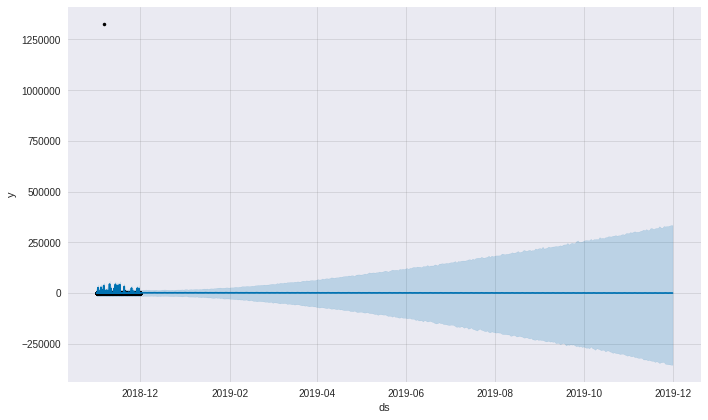

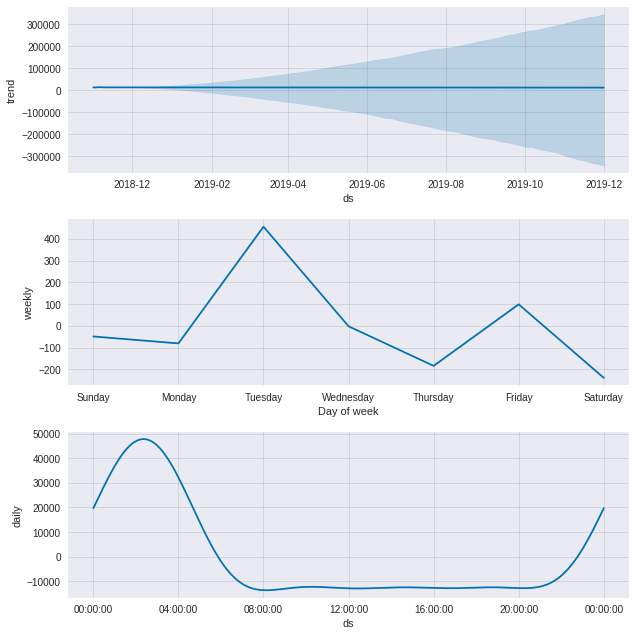

In [4]:
m = Prophet()
df = df.rename(columns = {'StartTime': 'ds', 'TripDistance': 'y'}) # rename columns
m.fit(df)

future = m.make_future_dataframe(periods=365)
future.tail()

forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

fig1 = m.plot(forecast)

fig2 = m.plot_components(forecast)